<b>PROJECT KELOMPOK</b>
<li>Ananda Muhammad Fitrah</li>
<li>Ilham Syukur Daulay</li>
<li>Nugroho Syhaputra</li>
<li>Raja Pati Pulungan</li>
<li>Yusuf Dominggo Manurung</li>

<h3> LIBRARY </h3>

In [4]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns #penampilan sebuah grafik
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

<li> DATA TRAINING DAN DATA TESTING </li>

In [5]:
train  = pd.read_csv('googleplaystore.csv')
test = pd.read_csv('googleplaystore_user_reviews.csv')

In [6]:
train.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
from textblob import TextBlob
#proses untuk melihat +- sebuah teks
train['polarity'] = train.apply(lambda x: TextBlob(x['App']).sentiment.polarity, axis=1)
#value atau nilai
train['subjectivity'] = train.apply(lambda x: TextBlob(x['App']).sentiment.subjectivity, axis=1)
train.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,polarity,subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.000000,0.00
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.000000,0.00
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.295455,0.65
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.000000,0.00
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.000000,0.00


<li> GRAFIK JUMLAH DATA TRAINING DAN DATA TESTING </li>

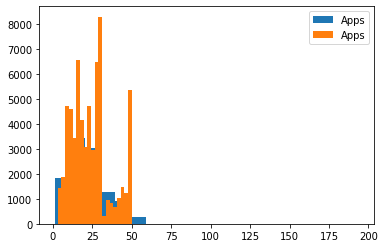

In [8]:
length_train = train['App'].str.len()
length_test = test['App'].str.len()

plt.hist(length_train, bins=20, label="Apps")
plt.hist(length_test, bins=20, label="Apps")
plt.legend()
plt.show()

In [9]:
#menambahkan nilai dari fungsi
combi = train.append(test, ignore_index=True)
combi.shape

C:\Users\ilham\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(75136, 19)

<h3> DATA CLEANING </h3>

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [11]:
combi['tidy_App'] = np.vectorize(remove_pattern)(combi['App'], "@[\w]*") 
combi.head()

,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Size,Translated_Review,Type,polarity,subjectivity,tidy_App
0,4.0.3 and up,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Everyone,1.0.0,Art & Design,"10,000+","January 7, 2018",0,4.1,159,NaN,NaN,NaN,19M,NaN,Free,0.000000,0.00,Photo Editor & Candy Camera & Grid & ScrapBook
1,4.0.3 and up,Coloring book moana,ART_AND_DESIGN,Everyone,2.0.0,Art & Design;Pretend Play,"500,000+","January 15, 2018",0,3.9,967,NaN,NaN,NaN,14M,NaN,Free,0.000000,0.00,Coloring book moana
2,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,Everyone,1.2.4,Art & Design,"5,000,000+","August 1, 2018",0,4.7,87510,NaN,NaN,NaN,8.7M,NaN,Free,0.295455,0.65,"U Launcher Lite – FREE Live Cool Themes, Hide Apps"
3,4.2 and up,Sketch - Draw & Paint,ART_AND_DESIGN,Teen,Varies with device,Art & Design,"50,000,000+","June 8, 2018",0,4.5,215644,NaN,NaN,NaN,25M,NaN,Free,0.000000,0.00,Sketch - Draw & Paint
4,4.4 and up,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Everyone,1.1,Art & Design;Creativity,"100,000+","June 20, 2018",0,4.3,967,NaN,NaN,NaN,2.8M,NaN,Free,0.000000,0.00,Pixel Draw - Number Art Coloring Book


In [12]:
combi['tidy_App'] = combi['tidy_App'].str.lower().str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,Android Ver,App,Category,Content Rating,Current Ver,Genres,Installs,Last Updated,Price,Rating,Reviews,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Size,Translated_Review,Type,polarity,subjectivity,tidy_App
0,4.0.3 and up,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Everyone,1.0.0,Art & Design,"10,000+","January 7, 2018",0,4.1,159,NaN,NaN,NaN,19M,NaN,Free,0.000000,0.00,photo editor candy camera grid scrapbook
1,4.0.3 and up,Coloring book moana,ART_AND_DESIGN,Everyone,2.0.0,Art & Design;Pretend Play,"500,000+","January 15, 2018",0,3.9,967,NaN,NaN,NaN,14M,NaN,Free,0.000000,0.00,coloring book moana
2,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,Everyone,1.2.4,Art & Design,"5,000,000+","August 1, 2018",0,4.7,87510,NaN,NaN,NaN,8.7M,NaN,Free,0.295455,0.65,u launcher lite free live cool themes hide apps
3,4.2 and up,Sketch - Draw & Paint,ART_AND_DESIGN,Teen,Varies with device,Art & Design,"50,000,000+","June 8, 2018",0,4.5,215644,NaN,NaN,NaN,25M,NaN,Free,0.000000,0.00,sketch draw paint
4,4.4 and up,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Everyone,1.1,Art & Design;Creativity,"100,000+","June 20, 2018",0,4.3,967,NaN,NaN,NaN,2.8M,NaN,Free,0.000000,0.00,pixel draw number art coloring book
5,2.3 and up,Paper flowers instructions,ART_AND_DESIGN,Everyone,1.0,Art & Design,"50,000+","March 26, 2017",0,4.4,167,NaN,NaN,NaN,5.6M,NaN,Free,0.000000,0.00,paper flowers instructions
6,4.0.3 and up,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,Everyone,1.1,Art & Design,"50,000+","April 26, 2018",0,3.8,178,NaN,NaN,NaN,19M,NaN,Free,0.000000,0.00,smoke effect photo maker smoke editor
7,4.2 and up,Infinite Painter,ART_AND_DESIGN,Everyone,6.1.61.1,Art & Design,"1,000,000+","June 14, 2018",0,4.1,36815,NaN,NaN,NaN,29M,NaN,Free,0.000000,0.00,infinite painter
8,3.0 and up,Garden Coloring Book,ART_AND_DESIGN,Everyone,2.9.2,Art & Design,"1,000,000+","September 20, 2017",0,4.4,13791,NaN,NaN,NaN,33M,NaN,Free,0.000000,0.00,garden coloring book
9,4.0.3 and up,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,Everyone,2.8,Art & Design;Creativity,"10,000+","July 3, 2018",0,4.7,121,NaN,NaN,NaN,3.1M,NaN,Free,0.350000,0.50,kids paint free drawing fun


<h3> TEXT NORMALIZATION </h3>

In [13]:
#proses mengubah teks menjadi bentuk aturan tunggal
tokenized_App = combi['tidy_App'].apply(lambda x: x.split()) # tokenizing

In [14]:
tokenized_App.head()

0              [photo, editor, candy, camera, grid, scrapbook]
1                                      [coloring, book, moana]
2    [u, launcher, lite, free, live, cool, themes, hide, apps]
3                                        [sketch, draw, paint]
4                   [pixel, draw, number, art, coloring, book]
Name: tidy_App, dtype: object

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_App = tokenized_App.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [16]:
for i in range(len(tokenized_App)):
    tokenized_App[i] = ' '.join(tokenized_App[i])
    
combi['tidy_App'] = tokenized_App

<h3> VISUALISASI </h3>

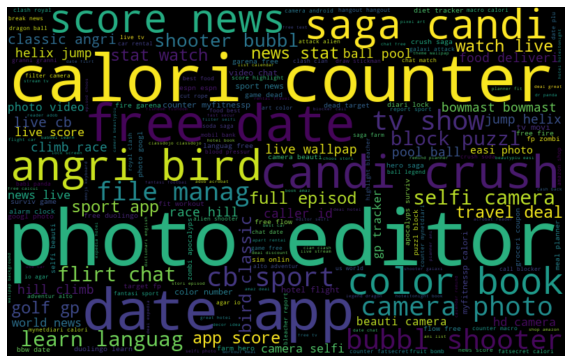

In [17]:
all_words = ' '.join([text for text in combi['tidy_App']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h3> EXTRACT FEATURE </h3>

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_App'])
tfidf.shape

(75136, 1000)

In [20]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_App'])
bow.shape

(75136, 1000)

<h3> KLASIFIKASI </h3>

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [22]:
train_bow = bow[:10841,:]
test_bow = bow[10841:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['polarity'],  
                                                          random_state=4, 
                                                          test_size=0.2)
print("train set", xtrain_bow.shape, ytrain.shape)
print("test set", xvalid_bow.shape, yvalid.shape)

train set (8672, 1000) (8672,)
test set (2169, 1000) (2169,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(ytrain)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(ytrain))
print(utils.multiclass.type_of_target(ytrain.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[54 54 54 ... 54 54 54]
continuous
multiclass
multiclass


In [25]:
k = 4

neigh = KNeighborsClassifier(n_neighbors = k).fit(xtrain_bow,training_scores_encoded)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [26]:
yhat = neigh.predict(xtrain_bow)
yhat[0:5]

array([54, 54, 54, 54, 54], dtype=int64)

In [27]:
yvalid[0:5]

10610    0.0
4253     0.0
7947     0.0
10259    0.0
5088     0.0
Name: polarity, dtype: float64

In [28]:
from sklearn import metrics
print("Train set Accuracy : ", metrics.accuracy_score(training_scores_encoded, neigh.predict(xtrain_bow)))
#print("Test set Accuracy : ", metrics.accuracy_score(yvalid, yhat))

Train set Accuracy :  0.8962177121771218


<h3> CLUSTERING </h3>

In [29]:
#menganalisa data -- mengelompokkn data dengan karakteristik yg sama ke suatu wilayah 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
tf = vectorizer.fit_transform(combi['tidy_App']).toarray()

In [30]:
tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
tf_feature_names = vectorizer.get_feature_names()
tf_feature_names

['#',
 'a',
 'ab',
 'abc',
 'abcmous',
 'ac',
 'account',
 'accuweath',
 'ace',
 'acorn',
 'acrobat',
 'action',
 'acupunctur',
 'ad',
 'ada',
 'adblock',
 'add',
 'addict',
 'adob',
 'adp',
 'adult',
 'adultfind',
 'advanc',
 'adventur',
 'advic',
 'adw',
 'adword',
 'ae',
 'aemet',
 'after',
 'ag',
 'agar',
 'age',
 'agenda',
 'agoda',
 'ah',
 'ai',
 'air',
 'airasia',
 'airbnb',
 'airborn',
 'airbrush',
 'airlin',
 'airport',
 'airway',
 'aj',
 'ak',
 'akin',
 'al',
 'alarm',
 'album',
 'alert',
 'alfr',
 'alien',
 'aliexpress',
 'all',
 'allegi',
 'allo',
 'allrecip',
 'alltrail',
 'alo',
 'alphabet',
 'alread',
 'altimet',
 'alto',
 'am',
 'amaz',
 'amazon',
 'amc',
 'america',
 'american',
 'amex',
 'amino',
 'amol',
 'amtrak',
 'ana',
 'analyt',
 'anatomi',
 'ancestri',
 'and',
 'android',
 'androzip',
 'anesthet',
 'anger',
 'angri',
 'ani',
 'anim',
 'anonym',
 'anthem',
 'anxieti',
 'anywher',
 'aol',
 'ap',
 'apart',
 'ape',
 'apex',
 'apk',
 'apocalyps',
 'app',
 'appl',
 '

In [32]:
kata= combi['tidy_App']

from sklearn.cluster import KMeans

k = 12
kmeans = KMeans(n_clusters = k, n_init = 20, n_jobs = 1)
kmeans.fit(tf)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print('Cluster ' + str(num) + ' : ' + ', '.join(tf_feature_names[kata] for kata in centroid))

Cluster 0 : food, deliveri, best, for, you, network, grubhub, calcul, calori, eat, journal, app, fresh, takeout, beyondmenu, day, stamp, balanc, ebt, eatstreet, doordash, caviar, challeng, and, order
Cluster 1 : date, chat, app, free, singl, flirt, meet, for, match, love, bbw, plu, hook, up, gay, sugar, interraci, black, video, text, messeng, badoo, adult, size, premium
Cluster 2 : game, free, for, color, number, by, book, draw, kid, the, art, pixel, dice, home, sandbox, adult, colorfi, your, d, simul, call, phone, best, shoot, fun
Cluster 3 : shop, amazon, kindl, deal, coupon, discount, better, aliexpress, groupon, live, smarter, video, onlin, s, weekli, save, kid, app, for, babi, flipp, flipkart, tablet, drive, tv
Cluster 4 : camera, hd, filter, for, android, selfi, beauti, lite, free, video, secur, b, fv, home, ultra, photo, cameringo, speed, sweet, pro, dslr, face, editor, phone, cam
Cluster 5 : tv, episod, full, show, watch, of, e, a, histori, special, live, cb, movi, free, app, n

In [33]:
kmeans.fit(tf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=20, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

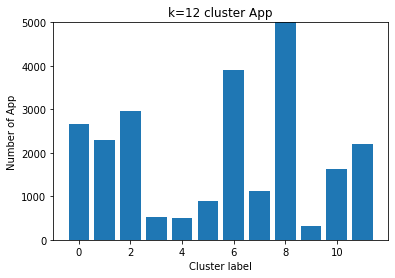

In [42]:
 plt.bar(range(len(set(kmeans.labels_))), np.bincount(kmeans.labels_))

plt.ylabel('Number of App')
plt.xlabel('Cluster label')
plt.title('k={} cluster App'.format(k));

# truncating the axis again!
plt.ylim(0,5000)
plt.show()